# **SME5924 - Processos Dinâmicos em Redes Complexas**


---


## **Questionário 6**

### Gabriela dos Santos Amaral

# **Introdução**

Notebook contendo os códigos desenvolvidos na linguagem *Python* para responder o questionário 6 da disciplina de Processos Dinâmicos em Redes Complexas (SME5924).

In [8]:
# Bibliotecas

from pylab import *
import numpy as np
from scipy.integrate import *
import matplotlib.pyplot as plt
from scipy.special import zeta
import networkx as nx

from numpy import linalg as LA

In [11]:
# Função Kuramoto model

# First-order Kuramoto model
def F(Y,t, G, W, lbd):
    #global W, N, lbd, G
    N = len(G.nodes())
    F = zeros((N),float)
    S = zeros((N),float)
    dg = G.degree()
    for i in range(0,N):
        for j in G.neighbors(i):
            S[i] = S[i] + sin(Y[j]-Y[i]) #
    ld = lbd
    F = W + ld*S #traditional Kuramoto
    return F

# **Questão 1**
Simular o modelo de Kuramoto em redes geradas pelos
modelos de Erdős–Rényi, Barabási–Albert e Watts–Strogatz. Em um mesmo gráfico, plotar a curva do parâmetro de ordem r em função do acoplamento lambda para cada rede. Analisar qual tipo de rede sincroniza com maior facilidade. Indicar também o valor teórico do acoplamento crítico.

Model: BA
Number of nodes: 100
Average degree:  9.5
Critical coupling: 0.14811086963305997

Model: ER
Number of nodes: 100
Average degree:  9.48
Critical coupling: 0.20113574102198756

Model: WS
Number of nodes: 100
Average degree:  10.0
Critical coupling: 0.2676770576717928



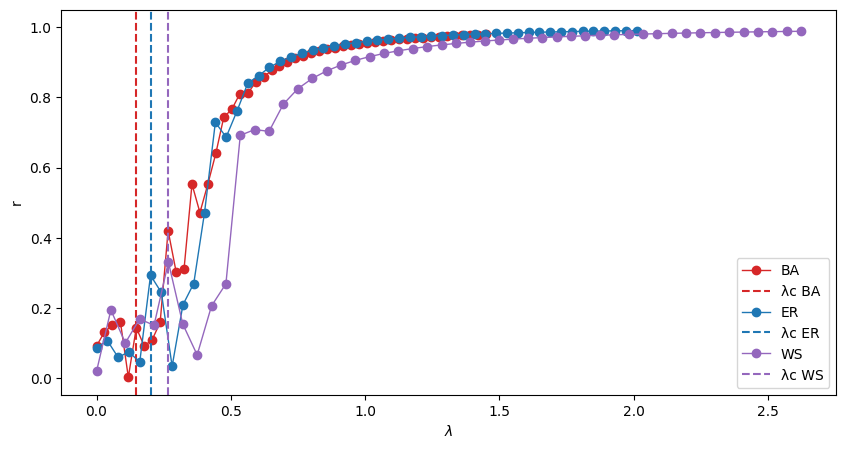

In [27]:
# Network parameters
N = 100 #number of nodes
av_degree = 10 # average degree
p = float(av_degree)/float(N) #probability of connection in the ER model
p_ = 0.1 #probability of rewiring
m = int(av_degree/2) # number of nodes included at each time step in the BA model
kappa = av_degree # number of neighbors in the WS model

seed = 42
colors = ['tab:red', 'tab:blue', 'tab:purple']

# Network models
models = {
    "BA": lambda: nx.barabasi_albert_graph(N, m, seed=seed),
    "ER": lambda: nx.erdos_renyi_graph(N, p, seed=seed),
    "WS": lambda: nx.watts_strogatz_graph(N, kappa, p_, seed=seed)
}


plt.figure(figsize=(10,5))

# Loop to generate a grafh with each model and plot the graphic r X lambda
for model in list(models.keys()):

  print(f'Model: {model}')

  G = models[model]()
  G = G.to_undirected()
  G = nx.convert_node_labels_to_integers(G, first_label=0)

  N = len(G) # Number of nodes
  vk = dict(G.degree())
  vk = list(vk.values())
  print("Number of nodes:", N)
  print("Average degree: ", mean(vk))
  av_k = mean(vk)

  from numpy import linalg as LA
  A = nx.adjacency_matrix(G)
  A = A.todense()
  eig, vectors = LA.eig(A)
  lambda_max = eig.max()

  # Initial phases
  w0 = np.pi
  y0 = np.random.normal(0, w0, size = N)


  # Natural frequencies
  W = np.random.uniform(-w0, w0, size = N)
  #W = np.random.normal(0, w0, size = N)

  # Critical couping %%%%%%%%%%%%%%%%
  hist, bin_edges = np.histogram(W, density=True)
  g0 = max(hist)
  lambda_c = 2/(np.pi*lambda_max*g0)
  print('Critical coupling:', lambda_c)

  # time of integration
  t0 = 0.0  # Start of integration
  h = 0.02 # Step size
  Np = 3000 # number of steps
  tStop = int(Np*h) # end of integration
  t = linspace(t0,tStop,Np)

  #forward sync
  vlbd = []  # vector that stores the coupling strength
  aux = 0
  Ns = 1 #Number of simulations
  vlbd = np.arange(0, 10*lambda_c, lambda_c/5) #variation of the coupling strength
  mvr = np.zeros(shape=shape(vlbd))
  for s in arange(0,Ns):
      vr = []  # vector that stores the order parameter
      for lbd in vlbd:
          y = odeint(F, y0, t, (G, W, lbd))
          y = np.array(y)
          y = y[range(len(y)-round(0.9*len(y)),len(y)),:]
          y = y.mean(0)
          psi = mean(y)
          r = abs((1.0/N)*sum(np.exp(1j*y)))
          vr.append(r)
          aux = aux + 1
          #print(aux, ": ", lbd, r)
          y0 = y # adiabatic increase
      mvr = mvr + vr
  mvr = mvr/Ns
  vlbd = array(vlbd, dtype=float)

  index = list(models.keys()).index(model)
  # show the results
  plt.plot(vlbd, mvr, '-o', linewidth=1, color=colors[index], label=model)
  plt.axvline(x=lambda_c, linestyle='--', label=f'λc {model}', color=colors[index])

  print('')

xlabel(r"$\lambda$")
ylabel("r")
plt.plot(True)
plt.legend()

plt.show()

Analisando o gráfico do parâmetro de ordem $r$ em função do acoplamento $\lambda$, temos que o modelo de Barabási–Albert (BA) apresenta o menor acoplamento crítico $\lambda_c$, com $\lambda_c = 0.148$, seguido do modelo Erdős–Rényi (ER), com $\lambda_c = 0.201$ e do modelo Watts–Strogatz (WS), com $\lambda_c =  0.268$, o maior valor. Isso indica que as redes que sincronizam com maior facilidade são aquelas associadas aos modelos BA e ER, por apresentarem menores valores críticos.

A partir de $\lambda = 0.5$, os modelos BA e ER exibem desempenhos bastante semelhantes no que diz respeito à evolução do parâmetro de ordem. No entanto, o modelo BA já começa a apresentar crescimento significativo de $r$ antes desse ponto, sinalizando uma transição para a sincronização mais precoce. Por outro lado, o modelo WS apresenta um comportamento mais lento, demorando mais para atingir níveis elevados de sincronização em comparação com os demais modelos.


# **Questão 2**
No modelo de Watts–Strogatz, investigar como a sincronização depende do parâmetro p (probabilidade de reconexão). Em um único gráfico, plotar a curva do parâmetro de ordem r em função do acoplamento lambda para diferentes valores de p (por exemplo:  =0.0, 0.0001; 0.001, 0.01, 0.1, 0.5). Avaliar se a rede sincroniza mais facilmente à medida que p aumenta.

Model with p = 0.0
Number of nodes: 100
Average degree:  10.0
Critical coupling: 0.20533324595780889

Model with p = 0.0001
Number of nodes: 100
Average degree:  10.0
Critical coupling: 0.21751415268541527

Model with p = 0.001
Number of nodes: 100
Average degree:  10.0
Critical coupling: 0.25970555698457365

Model with p = 0.01
Number of nodes: 100
Average degree:  10.0
Critical coupling: 0.2632839889636687

Model with p = 0.1
Number of nodes: 100
Average degree:  10.0
Critical coupling: 0.29997243822473557

Model with p = 0.5
Number of nodes: 100
Average degree:  10.0
Critical coupling: 0.2761256368606939



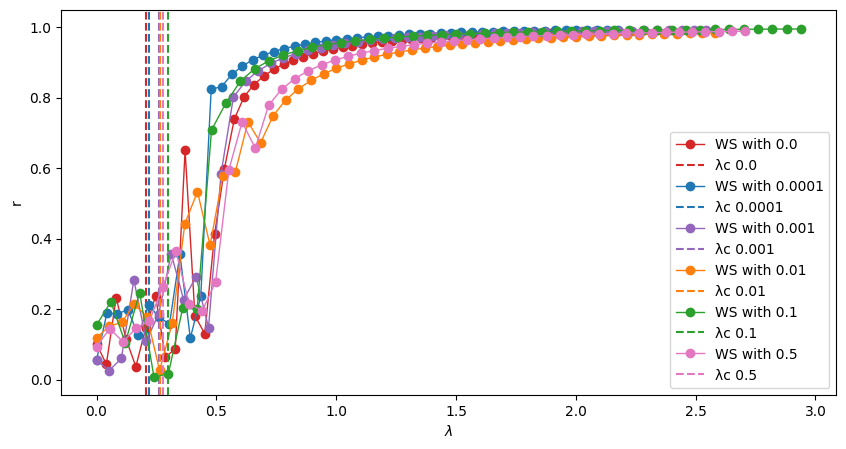

In [28]:
# Network parameters
N = 100 #number of nodes
av_degree = 10 # average degree
p_list = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5] #probability of rewiring
kappa = av_degree # number of neighbors in the WS model

seed = 42
colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:green', 'tab:pink']

plt.figure(figsize=(10,5))

# Loop to generate a grafh with each p and plot the graphic r X lambda
for p in p_list:

  print(f'Model with p = {p}')

  G = nx.watts_strogatz_graph(N, kappa, p_, seed=seed)
  G = G.to_undirected()
  G = nx.convert_node_labels_to_integers(G, first_label=0)

  N = len(G) # Number of nodes
  vk = dict(G.degree())
  vk = list(vk.values())
  print("Number of nodes:", N)
  print("Average degree: ", mean(vk))
  av_k = mean(vk)

  from numpy import linalg as LA
  A = nx.adjacency_matrix(G)
  A = A.todense()
  eig, vectors = LA.eig(A)
  lambda_max = eig.max()

  # Initial phases
  w0 = np.pi
  y0 = np.random.normal(0, w0, size = N)


  # Natural frequencies
  W = np.random.uniform(-w0, w0, size = N)
  #W = np.random.normal(0, w0, size = N)

  # Critical couping %%%%%%%%%%%%%%%%
  hist, bin_edges = np.histogram(W, density=True)
  g0 = max(hist)
  lambda_c = 2/(np.pi*lambda_max*g0)
  print('Critical coupling:', lambda_c)

  # time of integration
  t0 = 0.0  # Start of integration
  h = 0.02 # Step size
  Np = 3000 # number of steps
  tStop = int(Np*h) # end of integration
  t = linspace(t0,tStop,Np)

  #forward sync
  vlbd = []  # vector that stores the coupling strength
  aux = 0
  Ns = 1 #Number of simulations
  vlbd = np.arange(0, 10*lambda_c, lambda_c/5) #variation of the coupling strength
  mvr = np.zeros(shape=shape(vlbd))
  for s in arange(0,Ns):
      vr = []  # vector that stores the order parameter
      for lbd in vlbd:
          y = odeint(F, y0, t, (G, W, lbd))
          y = np.array(y)
          y = y[range(len(y)-round(0.9*len(y)),len(y)),:]
          y = y.mean(0)
          psi = mean(y)
          r = abs((1.0/N)*sum(np.exp(1j*y)))
          vr.append(r)
          aux = aux + 1
          #print(aux, ": ", lbd, r)
          y0 = y # adiabatic increase
      mvr = mvr + vr
  mvr = mvr/Ns
  vlbd = array(vlbd, dtype=float)

  index = p_list.index(p)
  # show the results
  plt.plot(vlbd, mvr, '-o', linewidth=1, color=colors[index], label=f'WS with {p}')
  plt.axvline(x=lambda_c, linestyle='--', label=f'λc {p}', color=colors[index])

  print('')

xlabel(r"$\lambda$")
ylabel("r")
plt.plot(True)
plt.legend()

plt.show()

Analisando o gráfico, temos que o modelo que apresentou o menor valor para o acoplamento crítico $\lambda_c$ foi o modelo Watts–Strogatz (WS) com $p = 0.0$ ($\lambda_c = 0.205$), seguido do modelo com $p = 0.0001$ ($\lambda_c = 0.218$), $p = 0.001$ ($\lambda_c = 0.260$), $p = 0.01$ ($\lambda_c = 0.263$), $p = 0.5$ ($\lambda_c = 0.276$) e, por fim, $p = 0.1$ ($\lambda_c = 0.300$). De modo geral, é possível sugerir uma tendência de que quanto maior o valor de $p$, maior tende a ser o valor de $\lambda_c$.

O modelo WS que sincroniza com maior facilidade é aquele com o $p = 0.0001$, que possui o segundo menor acoplamento crítico. Em seguinda, o que apresenta o segundo melhor desempenho de sincronização é o modelo com $p = 0.1$, que apresenta o maior valor de acoplamento crítico.

Dessa forma, não se observa um padrão claro entre o valor de $p$ e a facilidade de sincronização no modelo Watts–Strogatz (WS), sugerindo que a relação entre essas variáveis pode ser mais complexa e depender de outros aspectos estruturais da rede.
